# Packages

The main feature of Python is its extensive collection of packages that enhance its functionality. On this page, we will explore various aspects of working with some of these packages.

**Note:** Some packages have dedicated sections.

The table below lists the most useful python packages whose names are easy to forgot.

| Package         | Purpose / Goal                                  | Install Command             | Docs Link                                       |
| --------------- | ----------------------------------------------- | --------------------------- | ----------------------------------------------- |
| `pyperclip`     | Copy/paste clipboard cross-platform             | `pip install pyperclip`     | [Docs](https://pypi.org/project/pyperclip/)     |
| `python-dotenv` | Load `.env` file into environment variables     | `pip install python-dotenv` | [Docs](https://pypi.org/project/python-dotenv/) |
| `rich`          | Pretty terminal output (text, tables, markdown) | `pip install rich`          | [Docs](https://rich.readthedocs.io/)            |
| `typer`         | Build beautiful CLI apps with minimal code      | `pip install typer`         | [Docs](https://typer.tiangolo.com/)             |
| `pydantic`      | Data validation and parsing using Python types  | `pip install pydantic`      | [Docs](https://docs.pydantic.dev/)              |
| `httpx`         | Modern async/sync HTTP client                   | `pip install httpx`         | [Docs](https://www.python-httpx.org/)           |
| `schedule`      | Lightweight job scheduler                       | `pip install schedule`      | [Docs](https://schedule.readthedocs.io/)        |
| `watchdog`      | Watch for file system changes                   | `pip install watchdog`      | [Docs](https://python-watchdog.readthedocs.io/) |
| `click`         | Create command-line interfaces                  | `pip install click`         | [Docs](https://click.palletsprojects.com/)      |
| `loguru`        | Super simple logging                            | `pip install loguru`        | [Docs](https://loguru.readthedocs.io/)          |
| `tabulate`      | Format tables in plain text                     | `pip install tabulate`      | [Docs](https://pypi.org/project/tabulate/)      |
| `tqdm`          | Add progress bars to loops                      | `pip install tqdm`          | [Docs](https://tqdm.github.io/)                 |
| `colorama`      | Cross-platform terminal colors                  | `pip install colorama`      | [Docs](https://pypi.org/project/colorama/)      |
| `validators`    | Validate emails, URLs, IPs, etc.                | `pip install validators`    | [Docs](https://validators.readthedocs.io/)      |
| `filetype`      | Guess file type by content, not extension       | `pip install filetype`      | [Docs](https://pypi.org/project/filetype/)      |
| `humanize`      | Convert numbers/dates to human-readable formats | `pip install humanize`      | [Docs](https://pypi.org/project/humanize/)      |
| `yaspin`        | Pretty terminal spinners                        | `pip install yaspin`        | [Docs](https://github.com/pavdmyt/yaspin)       |
| `icecream`      | Debug print with context (like `ic()`)          | `pip install icecream`      | [Docs](https://github.com/gruns/icecream)       |
| `dateparser`    | Parse natural language dates                    | `pip install dateparser`    | [Docs](https://dateparser.readthedocs.io/)      |
| `shortuuid`     | Short, URL-safe UUIDs                           | `pip install shortuuid`     | [Docs](https://pypi.org/project/shortuuid/)     |


## tqdm

`tqdm` is a package that allows to create progress bars in the terminal using pseudographics. For more details check [specific page](tqdm.ipynb).

---

The following cell demonstrates typical usage of `tqdm`. The `tqdm.tqdm` object wraps an iterable in a `for` loop, so each iteration of the loop increments the progress bar by 1.

In [3]:
import tqdm
for _ in tqdm.tqdm(range(10), ncols=100, desc="my bar"): pass

my bar: 100%|███████████████████████████████████████████████████| 10/10 [00:00<00:00, 120180.63it/s]


## zipfile

`zipfile` is a package that allows you to operate on ZIP archives in Python.

---

As an example, we'll create a ZIP file using a Linux command line, and then unpack that archive using Python.

The following cell is creating file that we'll use as example.

In [17]:
%%bash
echo "zipped message" > zip_example_file
zip -r archive.zip zip_example_file
rm zip_example_file

  adding: zip_example_file (stored 0%)


Now, using `zipfile.ZipFile`, we'll open the created archive and extract all its contents to the current directory.

In [18]:
from zipfile import ZipFile
with ZipFile("archive.zip") as f:
    f.extractall(".")

Now we can check the contents of the extracted file - it the same like during creation.

In [19]:
!cat zip_example_file

zipped message


After everything is done, don't forget to clear the environment.

In [20]:
%%bash
rm -r zip_example_file archive.zip

## Psutil

`psutil` is a package that allows you to get in python program information about the harware resources used by a Python program. Check details in the [documentation](https://psutil.readthedocs.io/en/latest/) of the tool.

---

The following cell shows code to get information about the RAM used by the program.

In [13]:
import psutil
process = psutil.Process()
(process.memory_info().rss / (1024**2))

62.97265625

To make sure that it really works, the following cell creates a large object and counts the RAM used by the process.

In [ ]:
ans = [0 for _ in range(2**25)]
(process.memory_full_info().rss / (1024**2))

318.97265625

Now the number is much larger. Finally, delete the large object and measure the RAM again.

In [15]:
del ans
(process.memory_full_info().rss / (1024**2))

63.171875

## APScheduler

APScheduler is a package that allows to start and controll processes that will do some jobs according to some triggers.

For more check:

- Official [APScheduler documentation](https://apscheduler.readthedocs.io/en/3.x/index.html). 
- [Corresponding page](apscheduler.ipynb) on this website.

---

The following cell shows how to run the simplest `BackgroundScheduler`. This code will start a process that prints the current time to the console every 3 seconds.

In [1]:
from datetime import datetime
from apscheduler.schedulers.background import BackgroundScheduler
def periodic_task():
    print(datetime.now().time())

scheduler = BackgroundScheduler()
scheduler.add_job(periodic_task, "interval", seconds=3)
scheduler.start()

11:54:38.109044
11:54:41.108479
11:54:44.108156
11:54:47.108562
11:54:50.108621
11:54:53.108557


Stop the scheduler using the `shutdown` method.

In [2]:
scheduler.shutdown()

## Drawsvg

`drawsvg` is a package that allows you to describe SVG graphics with python code. Check out the [Drawsvg quick reference](https://cduck.github.io/drawsvg/).

The following table represents the basic features of the `drawsvg` package:

| Category          | Function / Class             | Description                                    |
|-------------------|------------------------------|------------------------------------------------|
| **Drawing**       | `drawsvg.Drawing`            | Create a drawing container.                    |
|                   | `Drawing.append`             | Append elements to the drawing.                |
|                   | `Drawing.to_svg`             | Export as an SVG string.                       |
|                   | `Drawing.save_svg`           | Save SVG directly to file.                     |
|                   | `Drawing.save_png`           | Export as PNG (requires `cairosvg`).           |
| **Composition**   | `drawsvg.Group`              | Group multiple elements (`<g>`).               |
|                   | `drawsvg.Use`                | Reuse elements by reference (`<use>`).         |
| **Shapes**        | `drawsvg.Rectangle`          | Draw rectangles.                               |
|                   | `drawsvg.Circle`             | Draw circles.                                  |
|                   | `drawsvg.Ellipse`            | Draw ellipses.                                 |
|                   | `drawsvg.Line`               | Draw straight lines.                           |
|                   | `drawsvg.Polygon`            | Draw polygons.                                 |
|                   | `drawsvg.Path`               | Freeform path drawing.                         |
| **Text**          | `drawsvg.Text`               | Add text elements.                             |
| **Transformations** | `drawsvg.Translate`        | Apply translation transform.                   |
|                   | `drawsvg.Scale`              | Apply scaling transform.                       |
|                   | `drawsvg.Rotate`             | Apply rotation transform.                      |
|                   | `element.set_transform`      | Set transform on an element.                   |
| **Accessibility** | `element.append_title`       | Add title (tooltip).                           |
|                   | `element.append_desc`        | Add description (for accessibility/metadata).  |

---

The following cell shows how to draw a cross on a red background using svg.

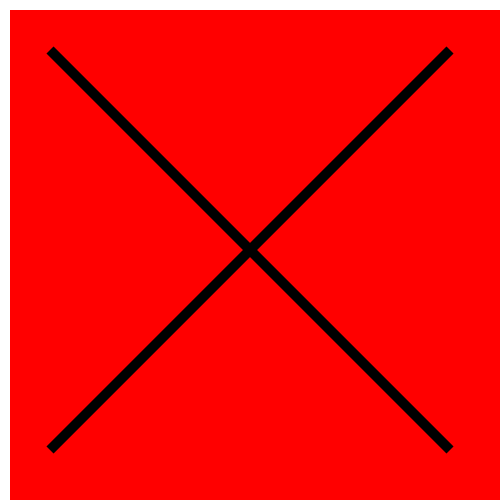

In [1]:
import drawsvg as dw
d = dw.Drawing(500, 500)
d.append(dw.Rectangle(10, 10, 490, 490, fill="red"))
d.append(dw.Line(50, 450, 450, 50, stroke='black', stroke_width=10))
d.append(dw.Line(50, 50, 450, 450, stroke='black', stroke_width=10))
d

As you can see, Jupyter knows how to represent the results of the drawsvg library.

For me, it's typically important to be able to load the corresponding SVG code. Do that with `as_svg` method of the drawsvg canvas.

In [2]:
print(d.as_svg())

<?xml version="1.0" encoding="UTF-8"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"
     width="500" height="500" viewBox="0 0 500 500">
<defs>
</defs>
<rect x="10" y="10" width="490" height="490" fill="red" />
<path d="M50,450 L450,50" stroke="black" stroke-width="10" />
<path d="M50,50 L450,450" stroke="black" stroke-width="10" />
</svg>


### Viewbox

Applying a viewbox can be a bit confusing. This is because original SVG syntax allows for some flexibility. In `drawsvg`, you have to specify exactly `viewBox` name (camel naming) and enter the value as a sting with four numbers separated by the space.

---

The following cell illustrates the use of the `viewBox`. It sets the viewbox to display only a corner of the rectangle added later.

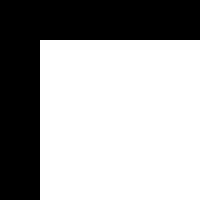

In [40]:
d = dw.Drawing(width=200, height=200, viewBox="-10 -10 100 100")
d.append(dw.Rectangle(
    0, 0, 200, 200,
    fill="none",
    stroke_width=20,
    stroke="black"
))
d

## Gradio

Gradio is an instrument that allows you to build simple user interfaces for taking some input and immediate output. It is ideal for prototyping the machine leaning models, but can also be used in more generally.

---

The following cell shows the `gradio` hello world and an approach to visualizing the output in a jupyter notebook.

In [3]:
import gradio as gr

def greet(name: str) -> str:
    return f"Hello {name}!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch(inline=True)

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


## AWS SDK

The AWS SDK for Python is the `boto3` package.

Obviously, you need a aws subscription to use the `boto3`. Fortunately, if you just familiarise yourself with the API you, can use the [`moto`](https://docs.getmoto.org/en/latest/) package, which mocks the behaviour of `boto3`.

The following table lists and describes the key components of the `boto3` package.

| Entity                | Description                                                            | Abstraction Level | Typical Use                                                            | Notes                                                                           |
| :-------------------- | :--------------------------------------------------------------------- | :---------------- | :--------------------------------------------------------------------- | :------------------------------------------------------------------------------ |
| **Client**            | Low-level interface that directly maps to AWS API operations.          | Low               | Perform AWS operations with full control over request parameters.      | Follows AWS API 1:1; returns plain dictionaries (no objects).                   |
| **Resource**          | Higher-level, object-oriented abstraction built on top of clients.     | High              | Work with AWS resources as Python objects instead of manual API calls. | Not all AWS services support resources; auto-manages pagination and references. |
| **Collection**        | Iterable abstraction that groups related resources.                    | Medium            | Iterate or filter groups of resources.                                 | Returned by resource properties (e.g. `buckets.all()`, `objects.filter()`).     |
| **Resource Instance** | Represents a single AWS resource (e.g., an S3 bucket or EC2 instance). | High              | Access attributes or perform actions on that specific resource.        | Exposes both attributes and actions of the AWS resource.                        |
| **Resource Meta**     | Holds low-level metadata about a resource.                             | N/A               | Access client and configuration of a resource.                         | Often used to access the underlying client for unsupported operations.          |
| **Waiter**            | Utility that polls AWS APIs until a resource reaches a desired state.  | Medium            | Wait for resources to be created, updated, or deleted.                 | Built into clients; waits for specific conditions.                              |
| **Paginator**         | Handles paginated API responses automatically.                         | Medium            | Iterate through results that span multiple pages.                      | Available via clients and some resources.                                       |

---

The following cell shows the `region` which is specified in my `~/.aws/config` file.

In [1]:
import boto3
from moto import mock_aws

mock = mock_aws()
mock.start()

session = boto3.session.Session()
print(session.region_name)

mock.stop()

us-east-1


### Moto

[Moto](https://docs.getmoto.org/en/latest/) enables the behaviour of AWS services to be mocked.

---

The following code creates an `s3` client and attemnts to list available buckets.

In [ ]:
import boto3
s3 = boto3.client("s3", region_name="us-west-2")

try:
    s3.list_buckets()
except Exception as e:
    print(e)

Unable to locate credentials


The result there is an error message indicating that there are no AWS credentials have been provided.

The following cell uses the same `boto3` code wrapped by the `moto` mock.

In [2]:
from moto import mock_aws
from pprint import pprint

mock = mock_aws()
mock.start()

s3 = boto3.client("s3", region_name="us-west-2")
pprint(s3.list_buckets())

mock.stop()

{'Buckets': [],
 'Owner': {'DisplayName': 'webfile', 'ID': 'bcaf1ffd86f41161ca5fb16fd081034f'},
 'ResponseMetadata': {'HTTPHeaders': {'content-type': 'application/xml',
                                      'x-amzn-requestid': 'tzN0rrlVDe1F4epGGP0GictXAyeEdVvaFkcoMC97KHZ3sZqlrJ8p'},
                      'HTTPStatusCode': 200,
                      'RequestId': 'tzN0rrlVDe1F4epGGP0GictXAyeEdVvaFkcoMC97KHZ3sZqlrJ8p',
                      'RetryAttempts': 0}}


The result the is some kind of AWS answer.

---

The following cell shows an example of creating a bucket (`some-bucket`), listing it and deleteting it. Moto somehow retains information about the behaviour of the bucket.

In [3]:
with mock_aws():
    region = "us-west-2"
    bucket_name = "some-bucket"

    s3 = boto3.client("s3", region_name=region)

    location = {'LocationConstraint': region}
    s3.create_bucket(
        Bucket=bucket_name,
        CreateBucketConfiguration=location
    )

    pprint(s3.list_buckets()["Buckets"])

    s3.delete_bucket(Bucket=bucket_name)

[{'CreationDate': datetime.datetime(2025, 10, 20, 12, 8, 15, tzinfo=tzutc()),
  'Name': 'some-bucket'}]
